# Rainfall Weather Forecasting


### Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things: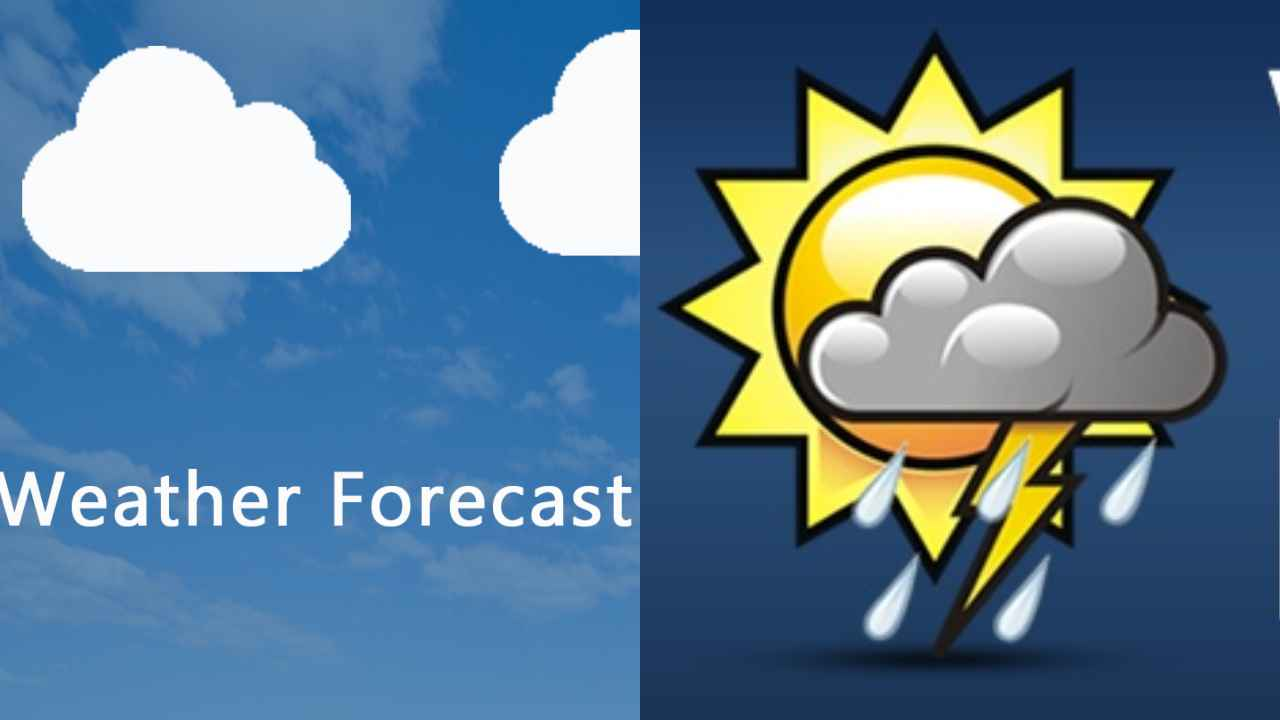
 
### Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


## Step 1: Reading and Understanding the Data

In [90]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from subprocess import check_output

#from sklearn.externals 
import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore,probplot
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('Rain_ds')
pd.set_option("display.max_columns",None)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [93]:
df.tail(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [94]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Attribute Information:
Number of columns: 23


Date  - This column shows date of observation

Location  -This column refers common name of the location of the weather station

MinTemp  -This column shows minimum temperature in degrees celsius

MaxTemp -This column shows maximum temperature in degrees celsius

Rainfall  -This column shows amount of rainfall recorded for the day in mm

Evaporation  -This column shows so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -This column shows number of hours of bright sunshine in the day.

WindGustDir- This column shows direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -This column shows speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -This column shows Direction of the wind at 9am

WindDir3pm -This column shows Direction of the wind at 3pm

WindSpeed9am -This column shows Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -This column shows Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -This column shows Humidity (percent) at 9am

Humidity3pm -This column shows Humidity (percent) at 3pm

Pressure9am -This column shows Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk"

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## Step 2: Data Preprocessing 

In [96]:
#Gandaling Null Values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [97]:
null_percentage = df.apply(pd.isnull).sum()*100/df.shape[0]

In [98]:
null_percentage

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [99]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count ",format(len(numerical_feature)))
print("Discrete Features Count ",format(len(discrete_feature)))
print("Continuous Features Count ",format(len(continuous_feature)))
print("Categorical Features Count ",format(len(categorical_feature)))

Numerical Features Count  16
Discrete Features Count  2
Continuous Features Count  14
Categorical Features Count  7


In [100]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [101]:
def randomsampleimputation(df, variable):
    df[variable] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [102]:
randomsampleimputation(df,"Cloud9am")
randomsampleimputation(df,"Cloud3pm")
randomsampleimputation(df,"Sunshine")
randomsampleimputation(df,"Evaporation")

In [103]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Setp 3 : EDA (Data Visualization)

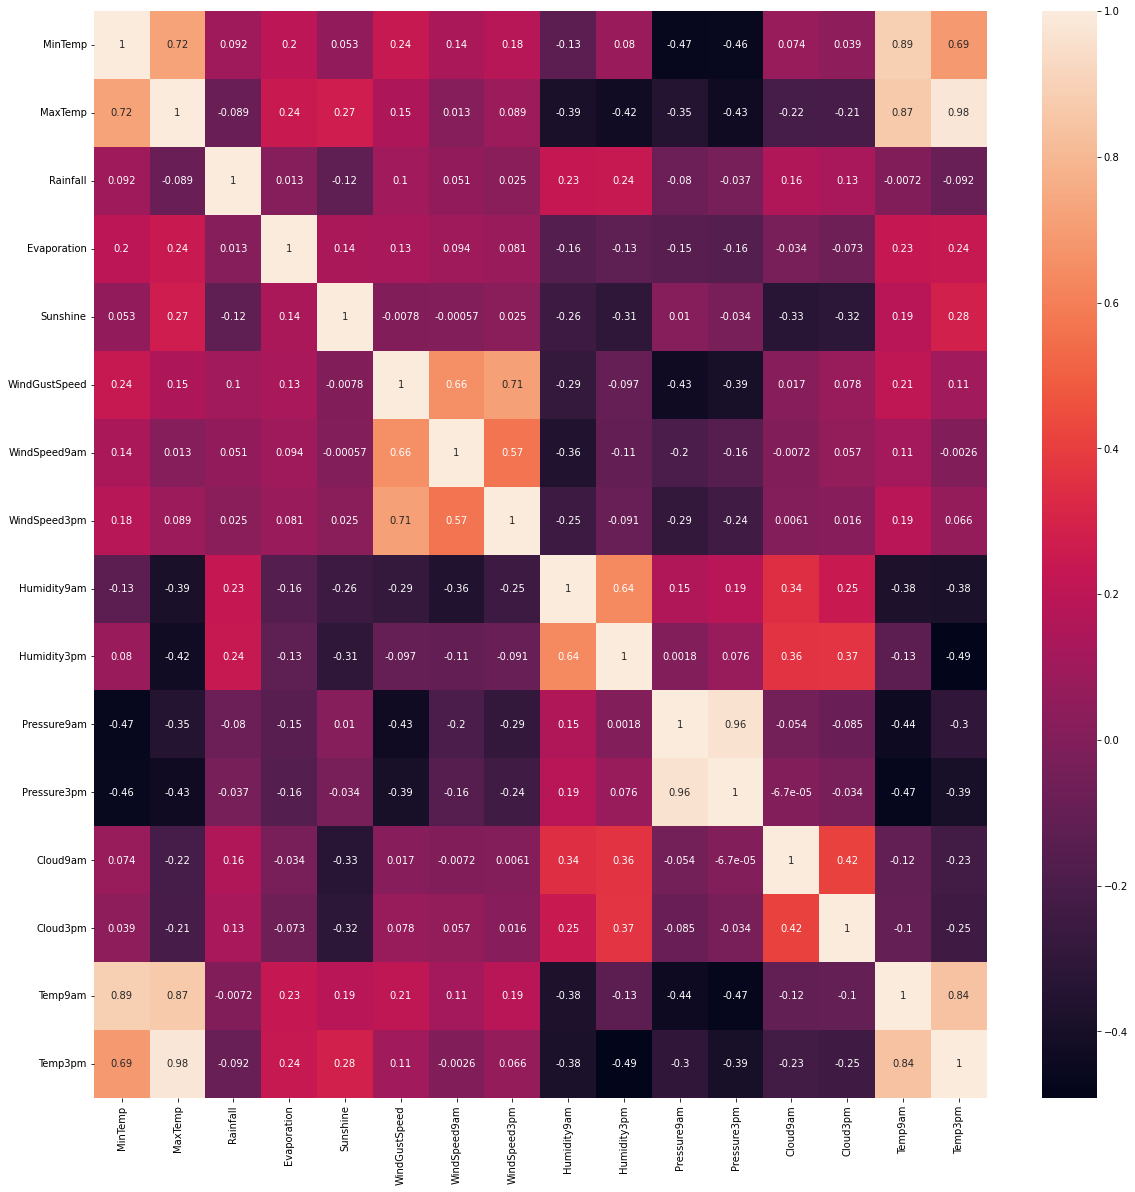

In [104]:
plt.figure(figsize=(20,20))
g=sns.heatmap(df.corr(),annot=True)

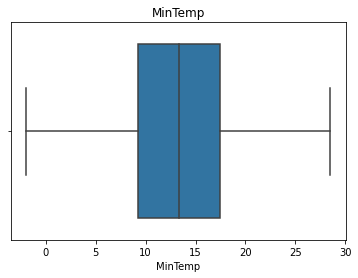

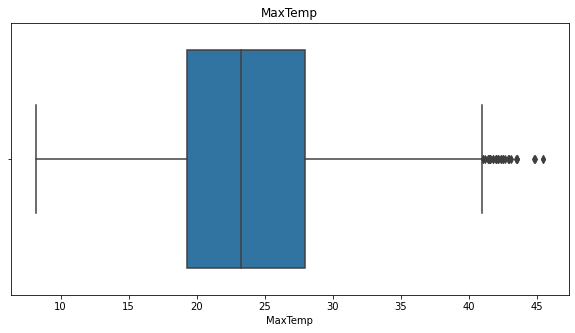

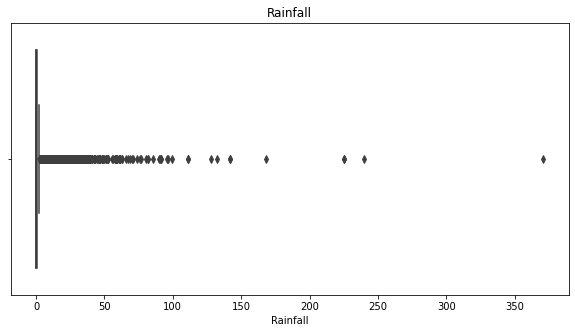

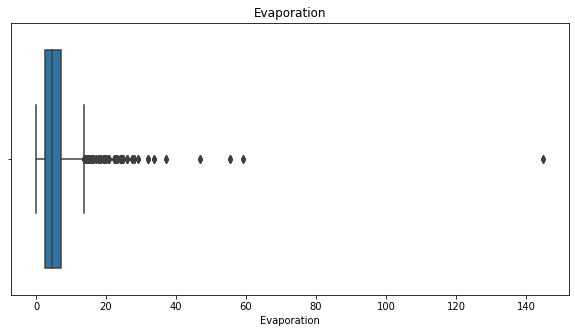

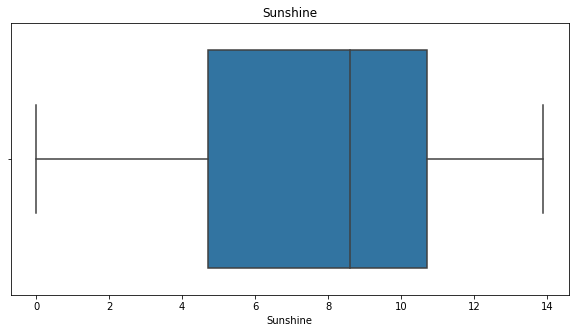

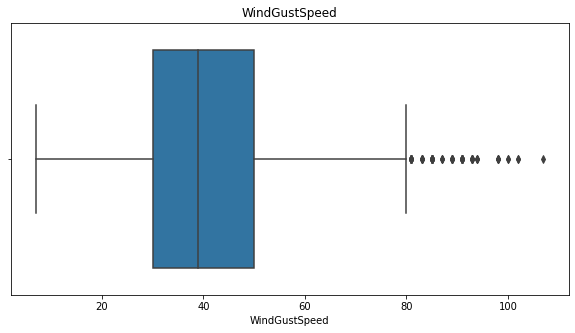

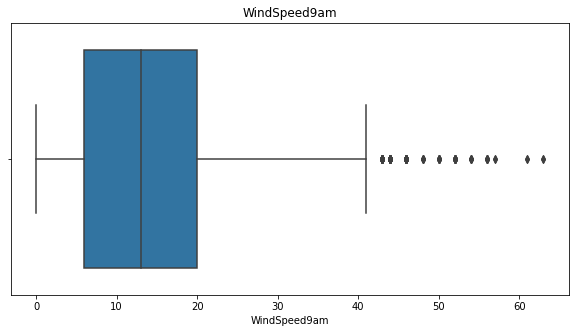

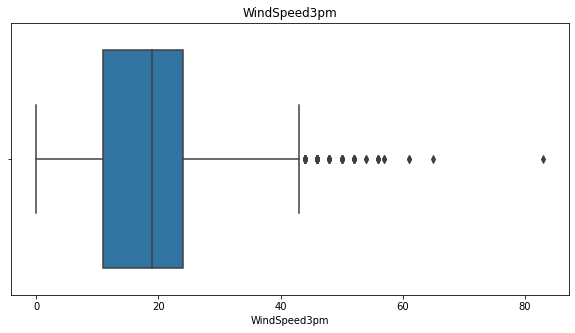

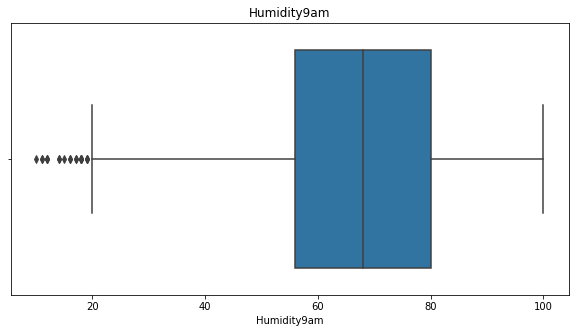

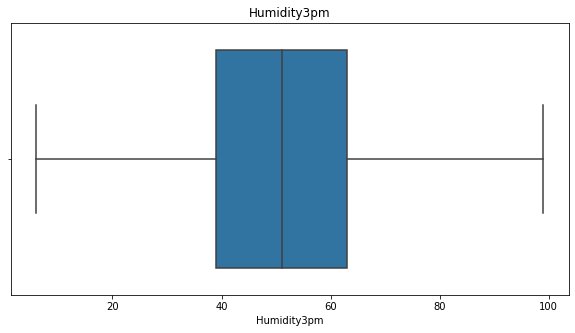

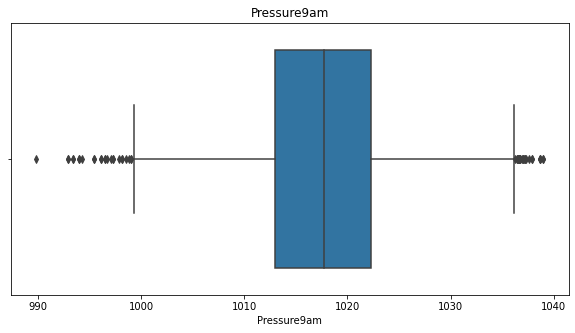

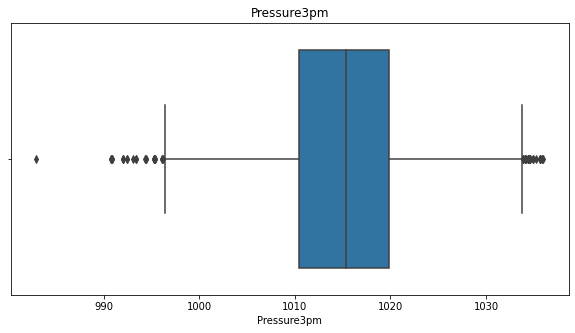

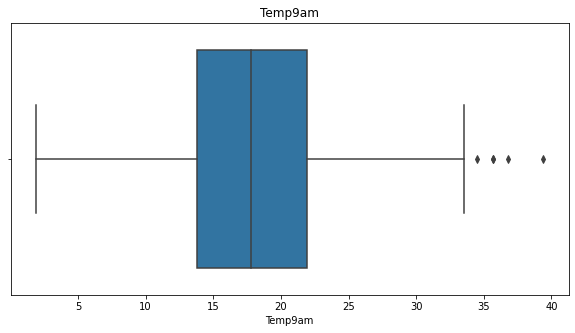

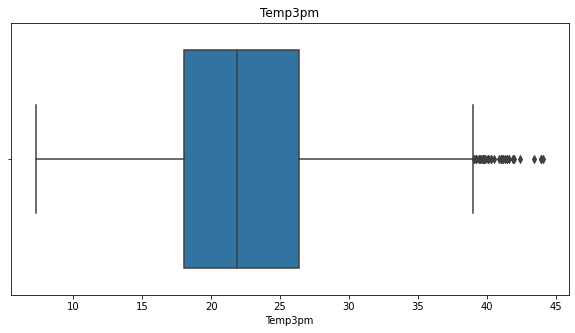

<Figure size 720x360 with 0 Axes>

In [105]:
#for loop to plot boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,5))

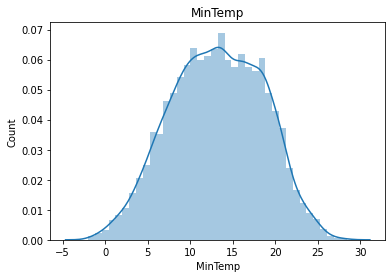

<Figure size 1080x1080 with 0 Axes>

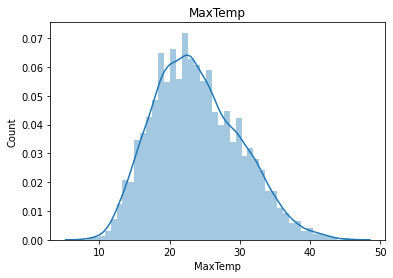

<Figure size 1080x1080 with 0 Axes>

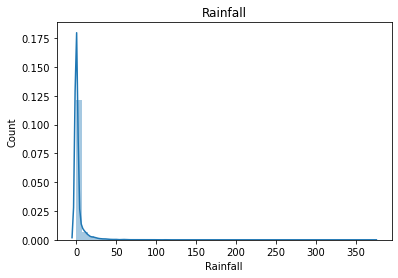

<Figure size 1080x1080 with 0 Axes>

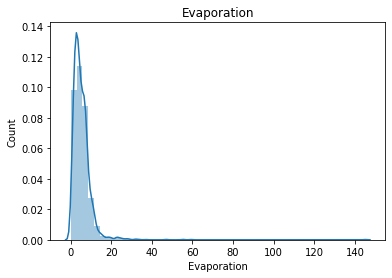

<Figure size 1080x1080 with 0 Axes>

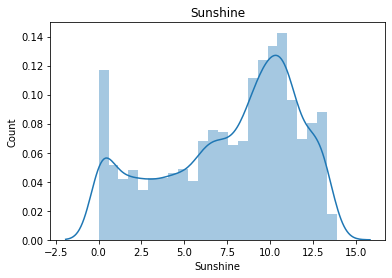

<Figure size 1080x1080 with 0 Axes>

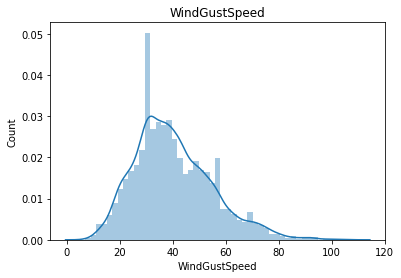

<Figure size 1080x1080 with 0 Axes>

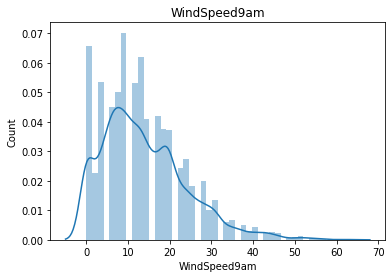

<Figure size 1080x1080 with 0 Axes>

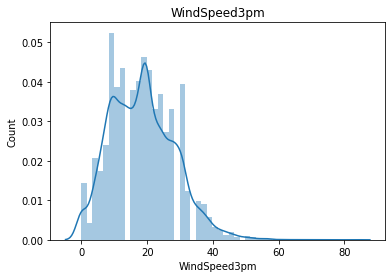

<Figure size 1080x1080 with 0 Axes>

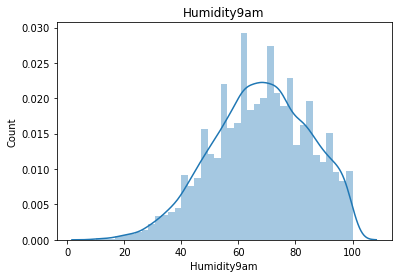

<Figure size 1080x1080 with 0 Axes>

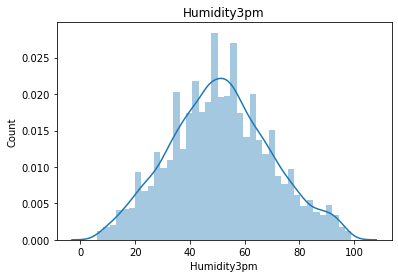

<Figure size 1080x1080 with 0 Axes>

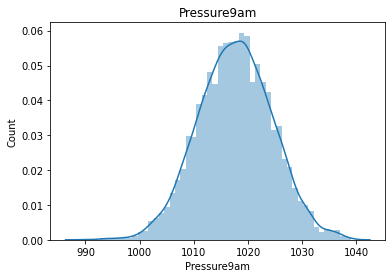

<Figure size 1080x1080 with 0 Axes>

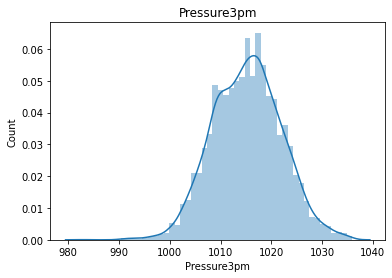

<Figure size 1080x1080 with 0 Axes>

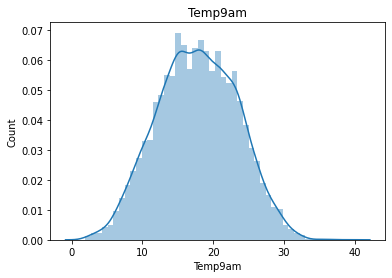

<Figure size 1080x1080 with 0 Axes>

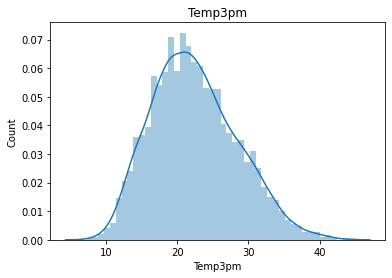

<Figure size 1080x1080 with 0 Axes>

In [106]:
for feature in continuous_feature:
    
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [108]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation         0
Sunshine            0
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am            0
Cloud3pm            0
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [109]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,8425.000000,8425.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,8425.000000,8425.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.395039,7.628368,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.581009,4.497329,17.762015,22.442934
std,5.403596,6.136408,10.459379,4.975088,3.899493,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877215,2.728847,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.700000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.600000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,6.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<Axes: >

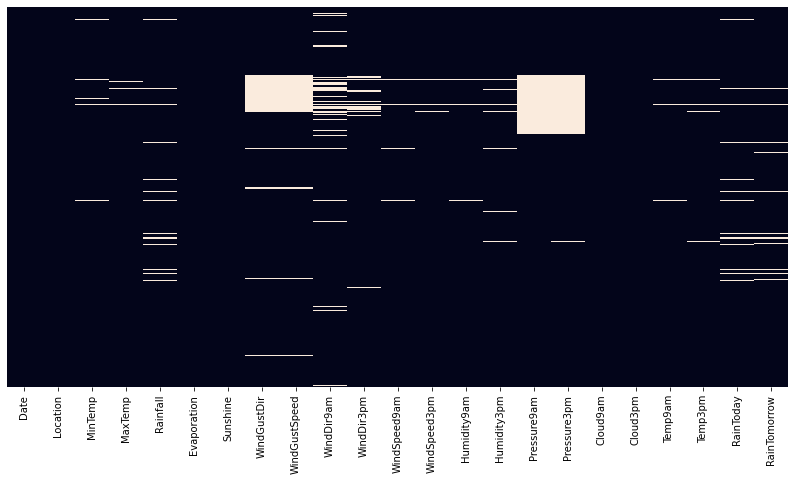

In [110]:
#Checking for null values
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Step 4: Data cleansing and Feature Engineering

In [111]:
#for Removing null values 
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())
        

In [112]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [113]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [114]:
df['Cloud9am'].unique()

array([8., 1., 2., 7., 0., 6., 5., 4., 3.])

In [115]:
df['Cloud3pm'].unique()

array([8., 4., 2., 7., 1., 6., 5., 0., 3.])

In [116]:
def mode_nan(df,variable):
    mode = df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")    
mode_nan(df,"Cloud3pm")    

In [117]:
#Encoding using get_dummies method pf pandas
df['RainToday'] = pd.get_dummies(df['RainToday'],drop_first=True)
df['RainTomorrow'] = pd.get_dummies(df['RainTomorrow'],drop_first=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [118]:
for feature in categorical_feature:
    print(feature,(df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending=False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [119]:
windgustdir = {'NNW':0, 'SSW':1, 'N':2, 'WSW':3, 'NW':4, 'SW':5, 'NNE':6, 'S':7, 'WNW':8, 'NE':9, 'SSE':10, 'SE':11, 'ESE':12, 'W':13, 'ENE':14, 'E':15}
windDir9am = {'N':0, 'WNW':1, 'SW':2, 'W':3, 'NNE':4, 'NNW':5, 'SSW':6, 'ESE':7, 'WSW':8, 'S':9, 'NW':10, 'NE':11, 'SSE':12, 'SE':13, 'ENE':14, 'E':15}
windDir3pm = {'NNW':0, 'SSW':1, 'N':2, 'NW':3, 'S':4, 'WSW':5, 'SW':6, 'NNE':7, 'SE':8, 'ENE':9, 'W':10,'WNW':11, 'E':12, 'SSE':13, 'NE':14, 'ESE':15}

df['WindGustDir'] = df['WindGustDir'].map(windgustdir) 
df['WindDir9am'] = df['WindDir9am'].map(windDir9am) 
df['WindDir3pm'] = df['WindDir3pm'].map(windDir3pm) 

In [120]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].value_counts().index[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].value_counts().index[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().index[0]) 

In [121]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Observation :Now dataset has no null values present anymore.

In [122]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [123]:
df1

RainTomorrow,0,1
Location,,
Adelaide,160.0,45.0
Albury,708.0,199.0
Brisbane,444.0,135.0
CoffsHarbour,425.0,186.0
Darwin,218.0,32.0
Melbourne,1216.0,406.0
Newcastle,624.0,198.0
Penrith,366.0,116.0
PerthAirport,962.0,242.0


In [124]:
df1[1].sort_values(ascending=False)

Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [125]:
df1[1].sort_values(ascending = False).index

Index(['Melbourne', 'Williamtown', 'PerthAirport', 'Albury', 'Newcastle',
       'CoffsHarbour', 'Brisbane', 'Wollongong', 'Penrith', 'Adelaide',
       'Darwin', 'Uluru'],
      dtype='object', name='Location')

In [126]:
location = {'Melbourne':1, 'Williamtown':2, 'PerthAirport':3, 'Albury':4, 'Newcastle':5,
       'CoffsHarbour':6, 'Brisbane':7, 'Wollongong':8, 'Penrith':9, 'Adelaide':10,
       'Darwin':11, 'Uluru':12}
df['Location'] = df['Location'].map(location)

In [127]:
df["Date"] = pd.to_datetime(df["Date"],format = "%Y-%m-%dT",errors="coerce")

In [128]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [129]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,4,13.4,22.9,0.6,3.0,13.8,13.0,44.0,3.0,11.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,4,7.4,25.1,0.0,2.2,7.6,8.0,44.0,5.0,5.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,4,12.9,25.7,0.0,4.6,7.7,3.0,46.0,3.0,5.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,4,9.2,28.0,0.0,1.8,8.0,9.0,24.0,13.0,12.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,4,17.5,32.3,1.0,3.8,11.9,13.0,41.0,14.0,3.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,12,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,9.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6,21
8421,2017-06-22,12,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6,22
8422,2017-06-23,12,5.4,26.9,0.0,4.2,13.0,2.0,37.0,13.0,11.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6,23
8423,2017-06-24,12,7.8,27.0,0.0,4.0,13.1,11.0,28.0,12.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


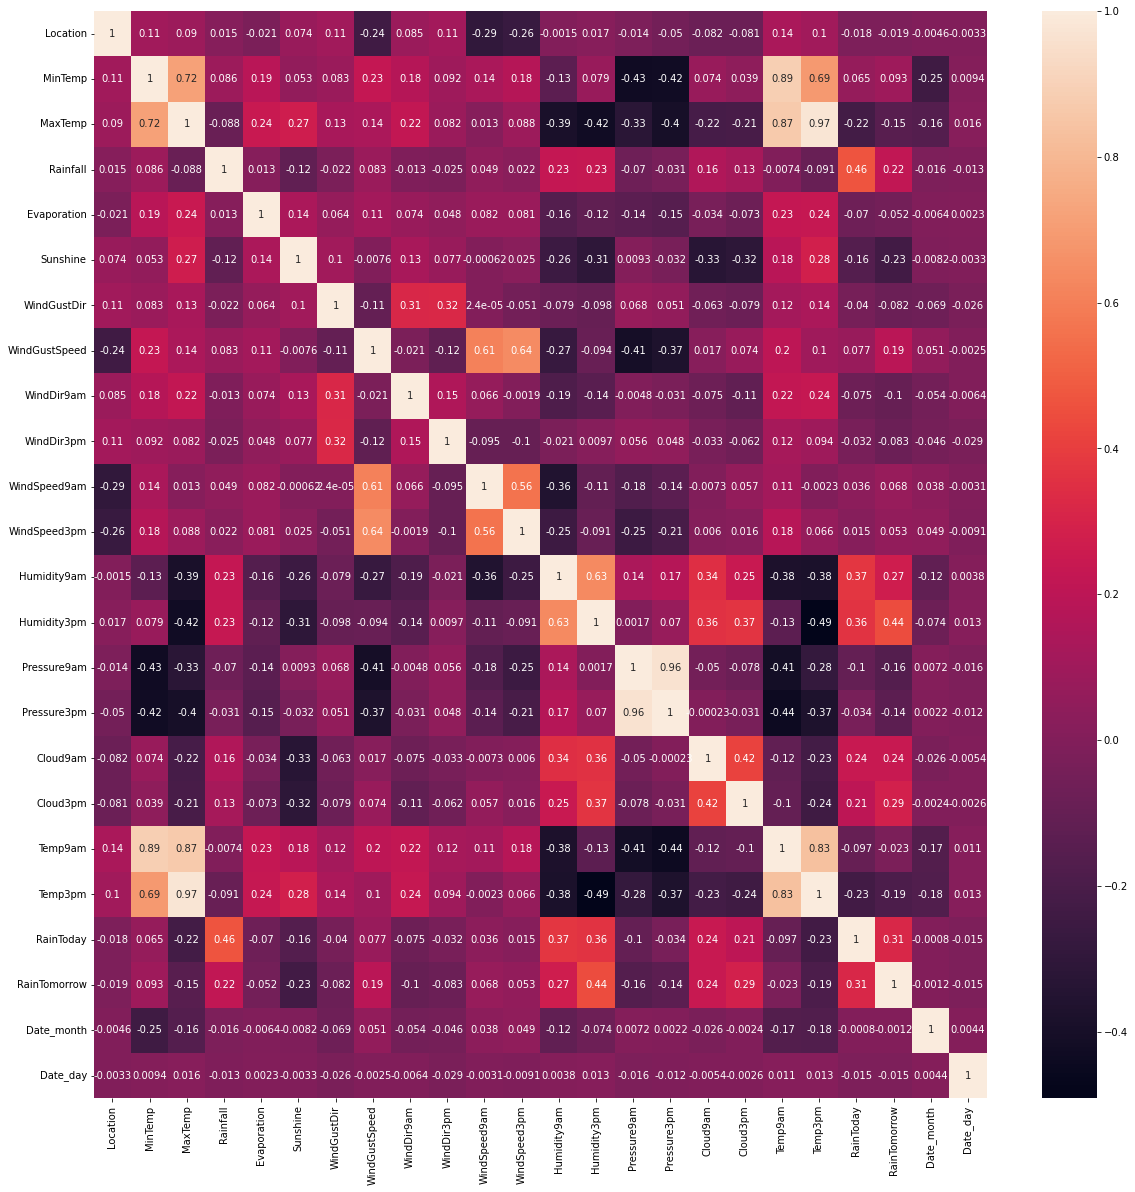

In [130]:
#plot heat map
plt.figure(figsize=(20,20))
g=sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='RainTomorrow', ylabel='count'>

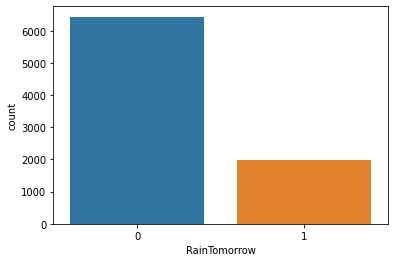

In [131]:
sns.countplot(df["RainTomorrow"])

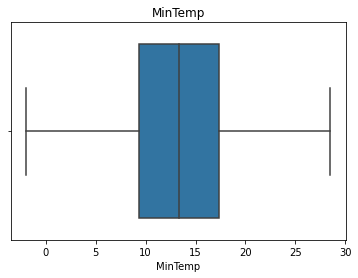

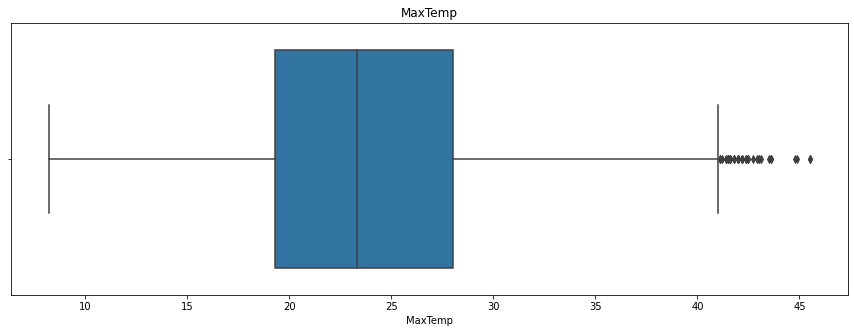

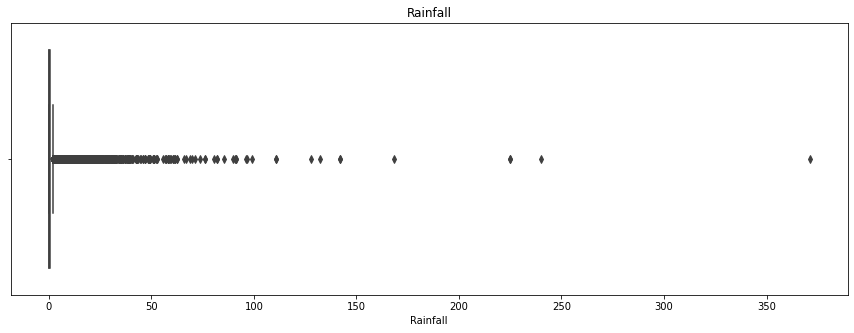

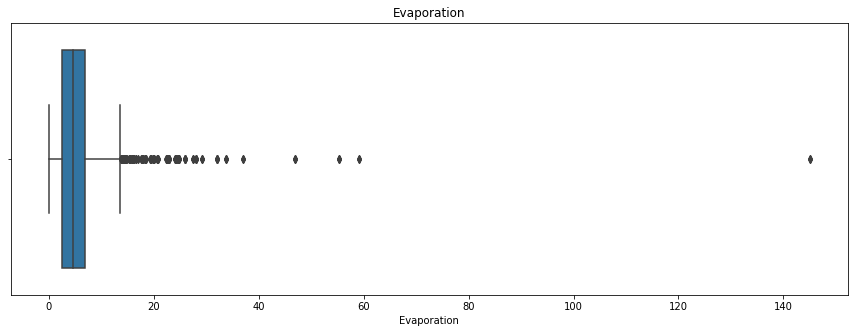

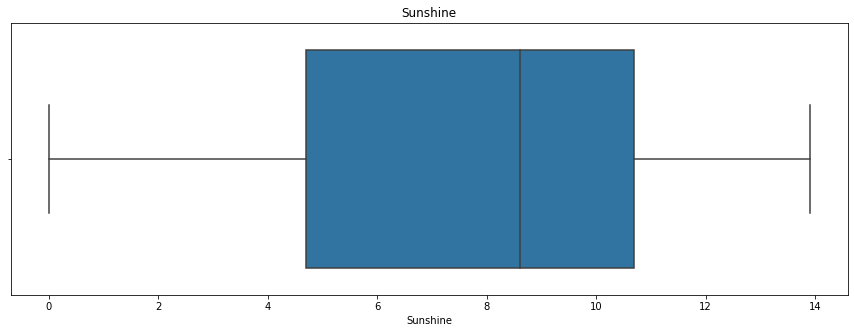

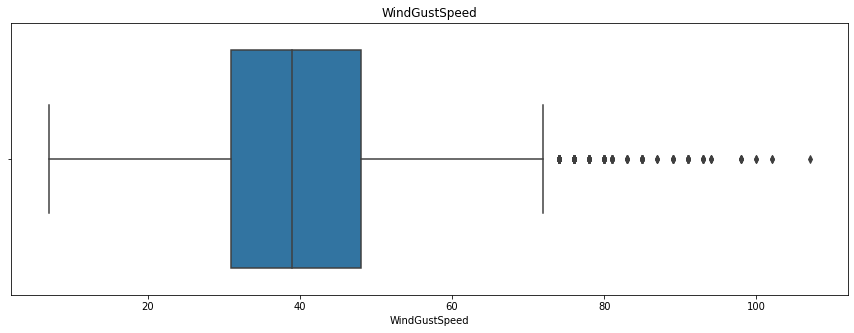

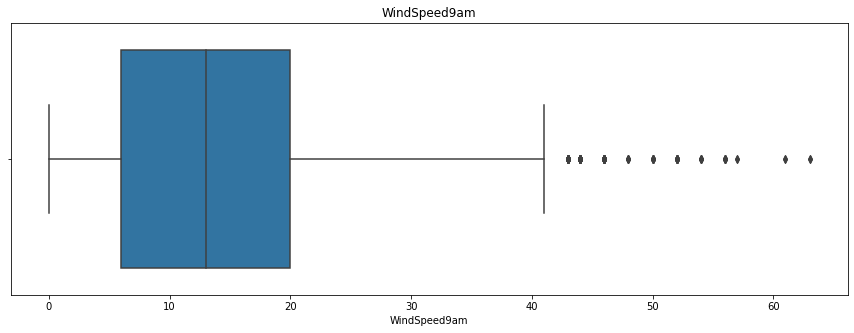

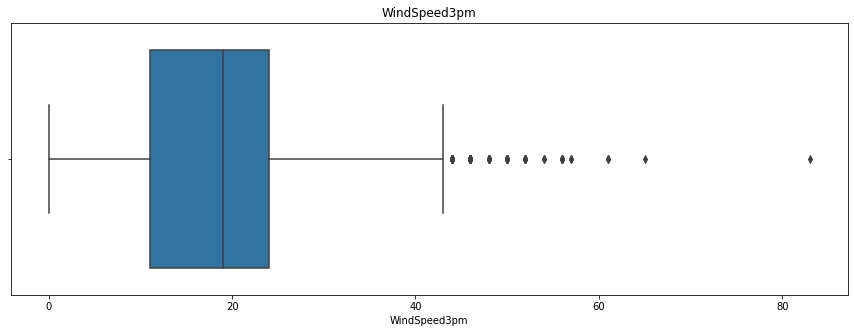

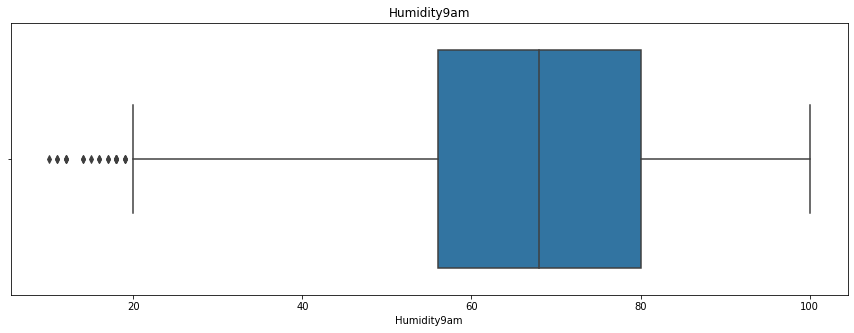

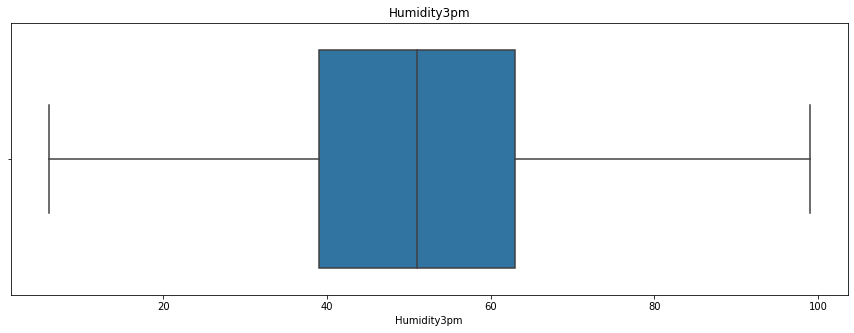

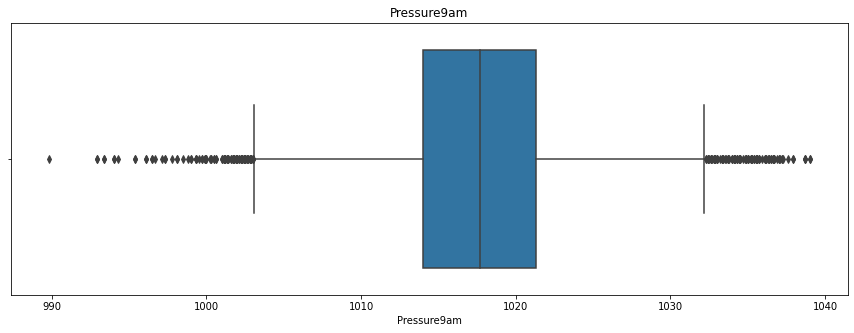

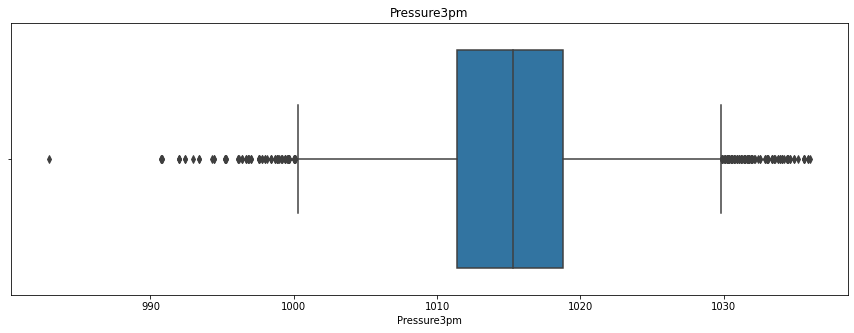

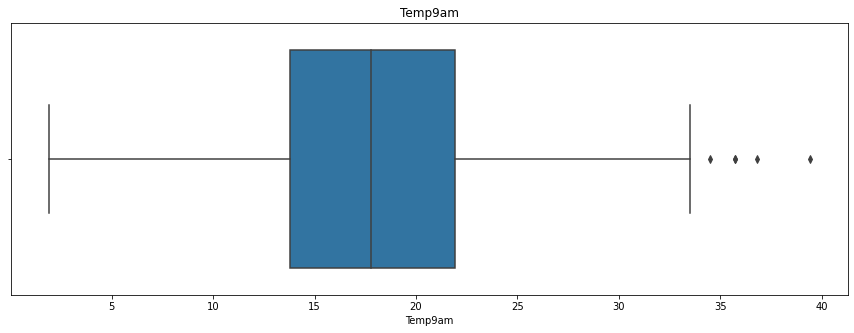

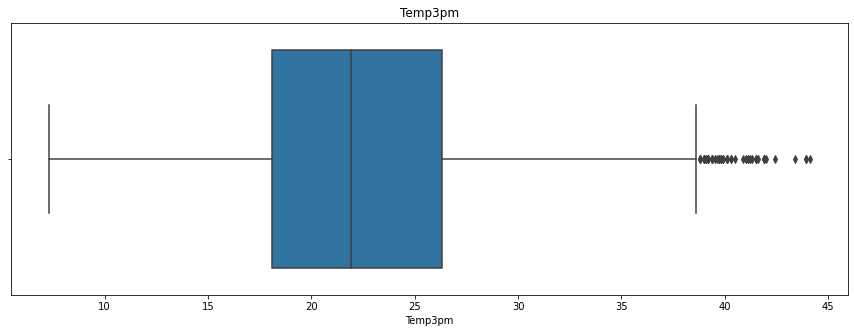

<Figure size 1080x360 with 0 Axes>

In [132]:
for feature in continuous_feature:
    data = df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5))

In [133]:
def qq_plots(df, variable):
    plt.figuare(figsize=(15,10))
    plt.subplot(1,2,1)
    df[varable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist = "norm", plot = plt)

MinTemp


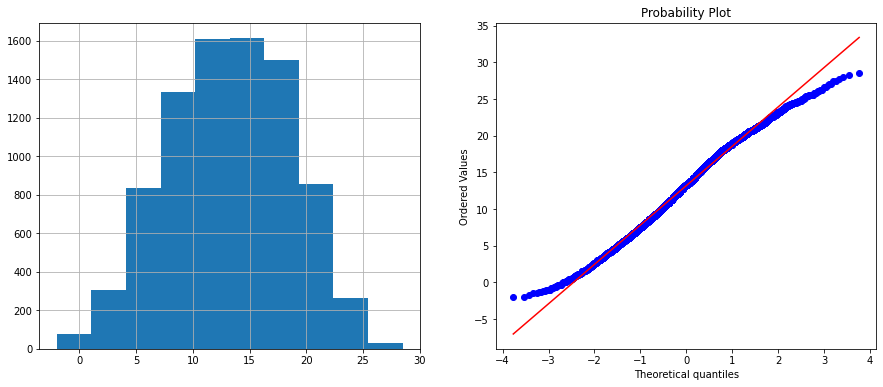

MaxTemp


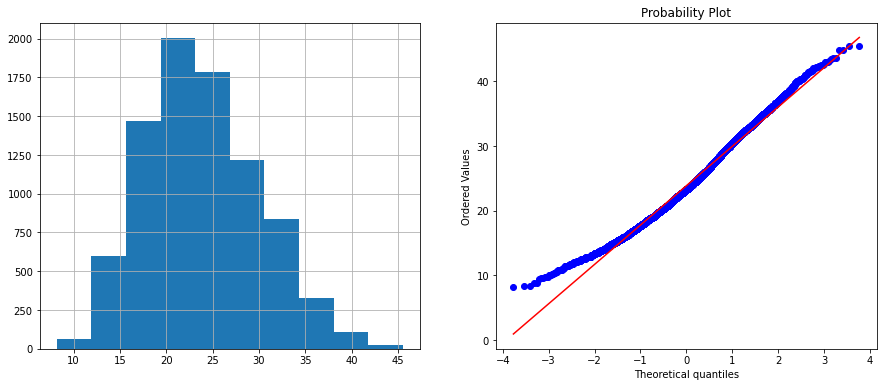

Rainfall


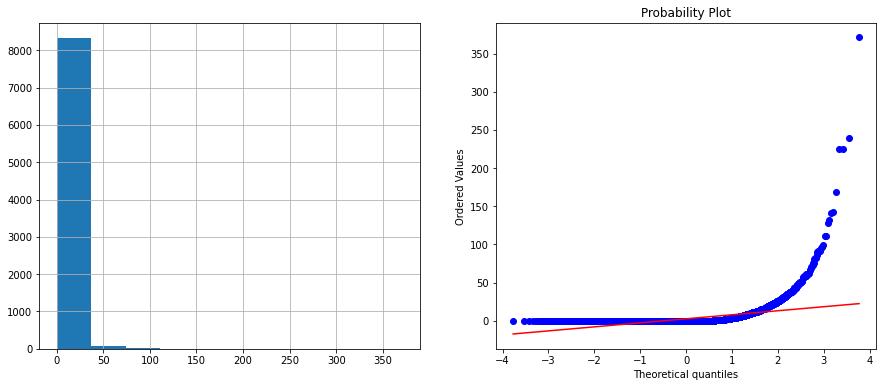

Evaporation


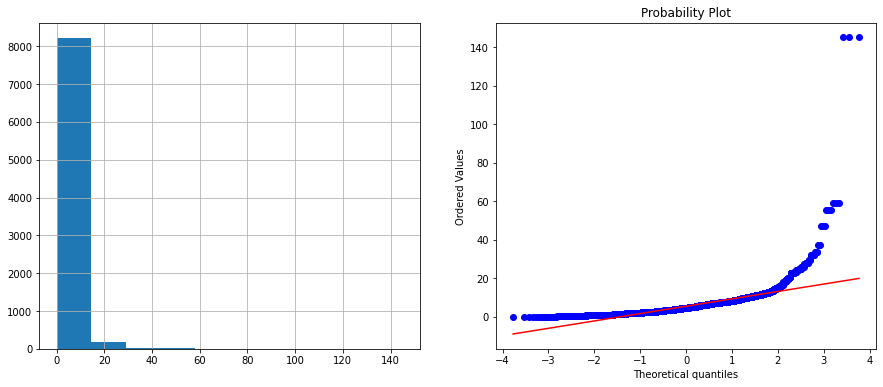

Sunshine


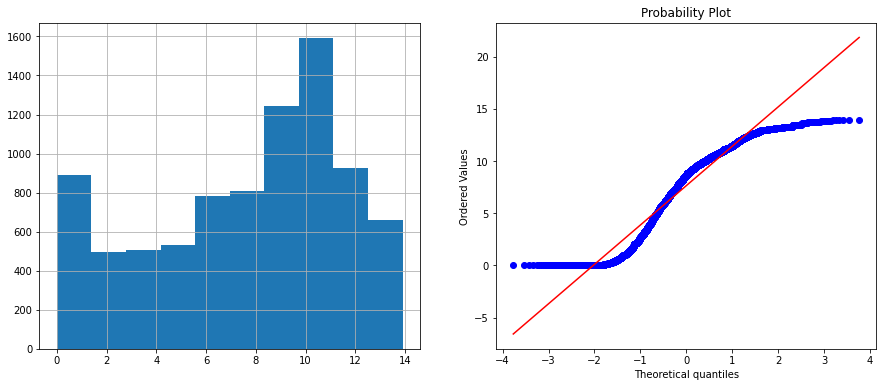

WindGustSpeed


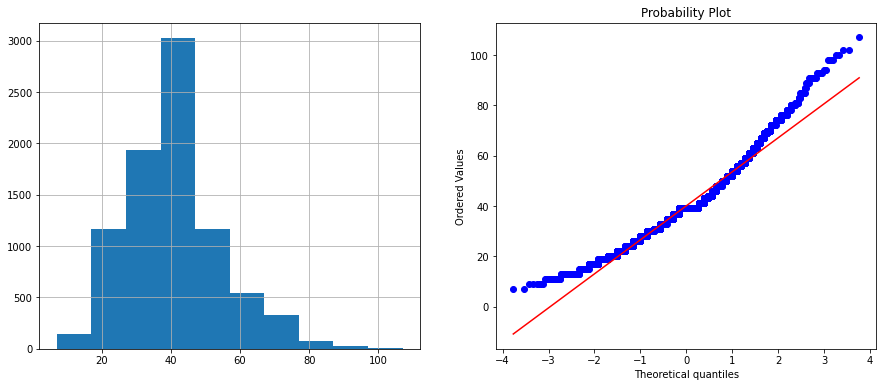

WindSpeed9am


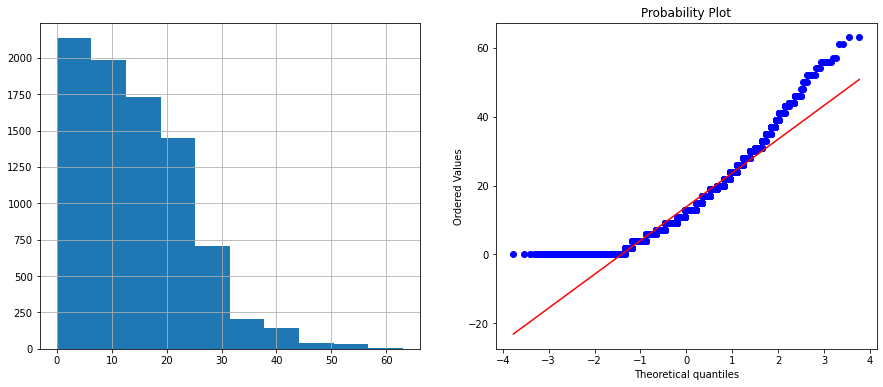

WindSpeed3pm


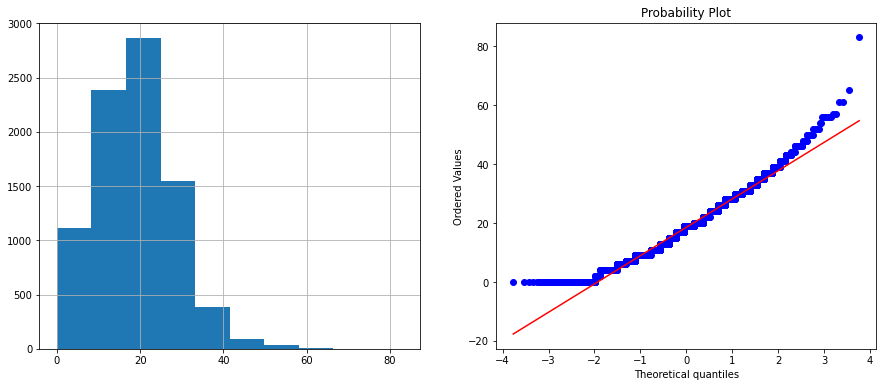

Humidity9am


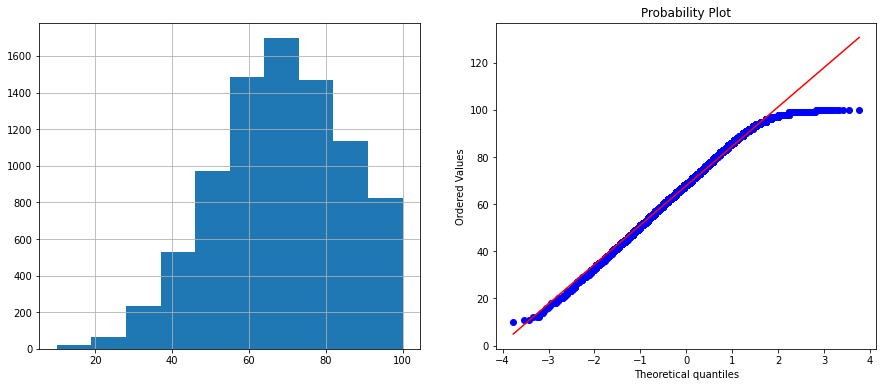

Humidity3pm


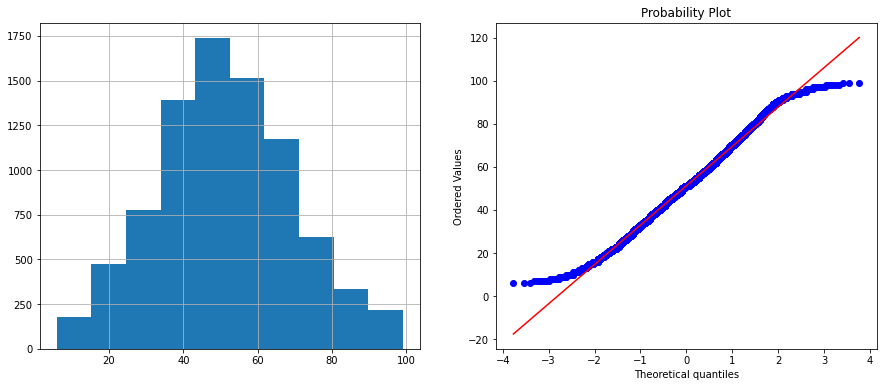

Pressure9am


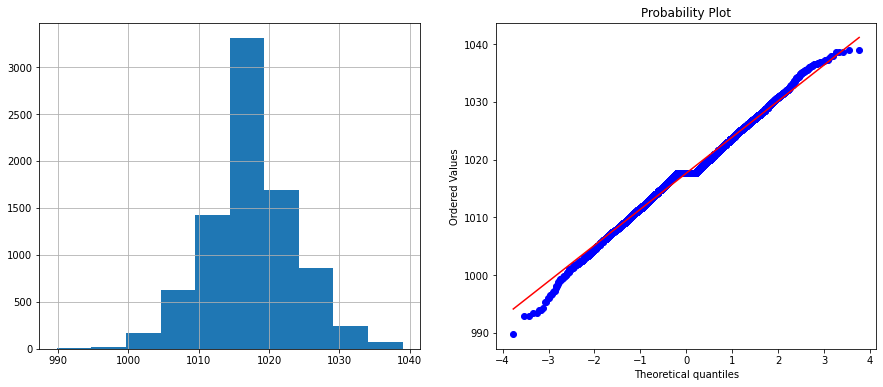

Pressure3pm


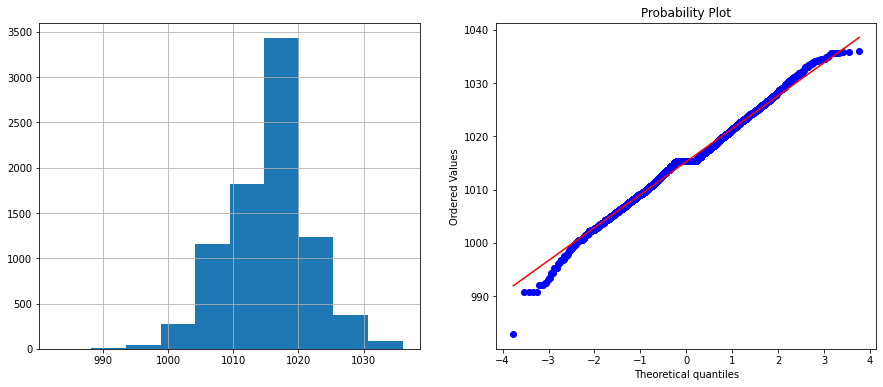

Temp9am


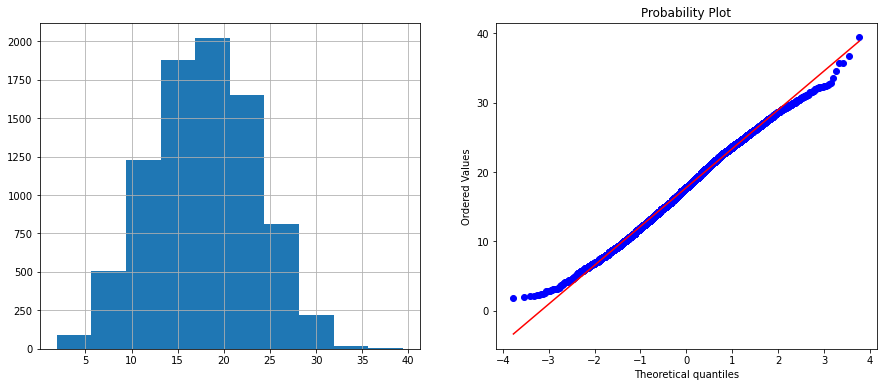

Temp3pm


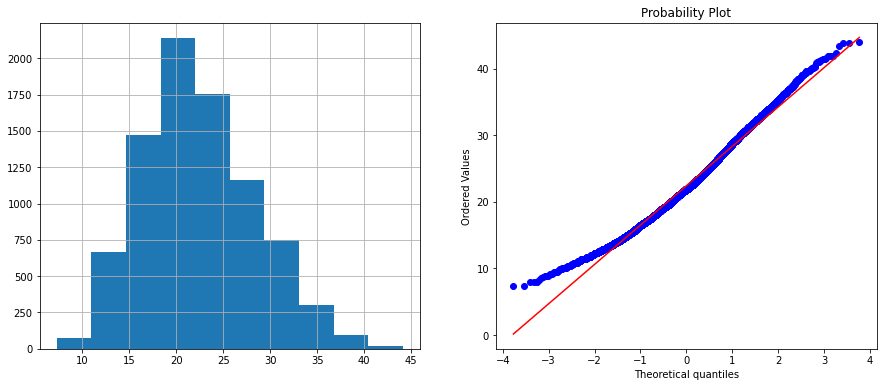

In [134]:
from scipy import stats
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1,  2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

## Step 5: Model building

In [135]:
df.drop("Date",inplace=True,axis=1)

In [136]:
#Now divide into dependent and independent variables.
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [137]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [138]:
X_train.shape,X_test.shape

((5897, 23), (2528, 23))

In [139]:
y_train.shape,y_test.shape

((5897,), (2528,))

In [140]:
lr = LogisticRegression() #Logistic regression

knn = KNeighborsClassifier() #K neighbhours classifier
svc = SVC()  #Support Vector Classifier
ada = AdaBoostClassifier()  #Ada boost classifier
gdboost = GradientBoostingClassifier()   #Gradient Boost Classifier
xgboost = XGBClassifier()     #Xtrim Gradient Boosting Classifier
print("Model is created.......")

Model is created.......


In [141]:
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
svc.fit(X_train,y_train)
ada.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained........")

Model is trained........


In [142]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("SVC classification score",svc.score(X_train,y_train))
print("ada boost classification score",ada.score(X_train,y_train))
print("Gradient boost classification score",gdboost.score(X_train,y_train))
print("Xtrim Gradient Boost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.8234695607936239
knn classification score 0.8736645752077328
SVC classification score 0.7595387485161946
ada boost classification score 0.8331354926233678
Gradient boost classification score 0.866372731897575
Xtrim Gradient Boost classification score 0.9981346447346108


# Step 5: Model Evaluation


Using confusion matrix in order to evaluate the models accuracy.


In [143]:
lr_ypred = lr.predict(X_test)
knn_ypred = knn.predict(X_test)
svc_ypred = svc.predict(X_test)
adb_ypred = ada.predict(X_test)
Grbst_ypred = gdboost.predict(X_test)
XtGradnt_ypred = xgboost.predict(X_test)

Using Confusion Matrix in order to evaluate the models accuracy

In [144]:
lr_conf_matrix = confusion_matrix(y_test,lr_ypred)
print("Confusion matrix for lr_model",'\n',lr_conf_matrix)

Confusion matrix for lr_model 
 [[1842  115]
 [ 301  270]]


In [145]:
knn_conf_matrix = confusion_matrix(y_test,knn_ypred)
print("Confusion matrix for KNN_model",'\n',knn_conf_matrix)

Confusion matrix for KNN_model 
 [[1840  117]
 [ 293  278]]


In [146]:
svc_conf_matrix = confusion_matrix(y_test,svc_ypred)
print("Confusion matrix for svc_model",'\n',svc_conf_matrix)

Confusion matrix for svc_model 
 [[1956    1]
 [ 569    2]]


In [147]:
ada_conf_matrix = confusion_matrix(y_test,adb_ypred)
print("Confusion matrix for ada boost_model",'\n',ada_conf_matrix)

Confusion matrix for ada boost_model 
 [[1845  112]
 [ 298  273]]


In [148]:
gdboost_conf_matrix = confusion_matrix(y_test,Grbst_ypred)
print("Confusion matrix for gdboost_model",'\n',gdboost_conf_matrix)

Confusion matrix for gdboost_model 
 [[1876   81]
 [ 282  289]]


In [149]:
xgboost_conf_matrix = confusion_matrix(y_test,XtGradnt_ypred)
print("Confusion matrix for XtGradnt_ypred_model",'\n',xgboost_conf_matrix)

Confusion matrix for XtGradnt_ypred_model 
 [[1878   79]
 [ 204  367]]


Checking Classification Report for each Model:

In [150]:
lr_report = classification_report(y_test,lr_ypred)
print("lr classification_report",'\n',lr_report)

knn_report = classification_report(y_test,knn_ypred)
print("knn classification_report",'\n',knn_report)

scv_report = classification_report(y_test,svc_ypred)
print("scv classification_report",'\n',scv_report)

adb_report = classification_report(y_test,adb_ypred)
print("adb classification_report",'\n',adb_report)

Grbst_report = classification_report(y_test,Grbst_ypred)
print("Grbst classification_report",'\n',Grbst_report)

XtGradnt_report = classification_report(y_test,XtGradnt_ypred)
print("XtGradnt classification_report",'\n',XtGradnt_report)

lr classification_report 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1957
           1       0.70      0.47      0.56       571

    accuracy                           0.84      2528
   macro avg       0.78      0.71      0.73      2528
weighted avg       0.82      0.84      0.82      2528

knn classification_report 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1957
           1       0.70      0.49      0.58       571

    accuracy                           0.84      2528
   macro avg       0.78      0.71      0.74      2528
weighted avg       0.83      0.84      0.83      2528

scv classification_report 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      1957
           1       0.67      0.00      0.01       571

    accuracy                           0.77      2528
   macro avg       0.72      0.50      0.44  

# ROC AUC Curve:

To evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [151]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,ada.predict(X_test)))
print(roc_auc_score(y_test,svc.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.7070456137964485
0.7135398815335313
0.7104390633291779
0.5014958203834275
0.7323698573623626
0.8011820694851747


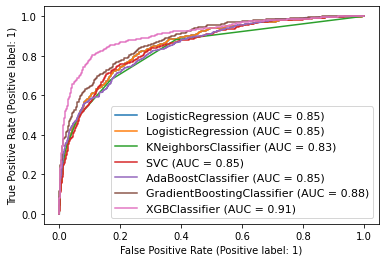

In [152]:
#lets find roc curve to check best fittted model

disp = plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')


## Step 6: K-Fold Cross Validation


K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 3 folds (K = 3). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation every time.

In [153]:
#Importing cross validation from sklearn.
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [154]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())


Mean of Cross validation score for gdboost  model => 0.8170919881305639
Cross validation score for xgboost model => 0.8206528189910978


As per above we can see our ‘xgboost’ model giving the less cross validation score. so we will consider this model is best for our prediction.Now hyperparameter tuning to check chances of accuracy increase.

In [155]:
from sklearn.model_selection import GridSearchCV
xgboost.get_params().keys()  # to check the parameters
parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}

#giving above parameters to our model and behalf of this will train it again.
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)
#fit the model using given paramters
gridsearch.fit(X_train,y_train)
#traning the model now

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [156]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth=4,min_child_weight=2,random_state=4,subsample=0.8)
#supplying best parameters to our model
xgboost_tuning.fit(X_train,y_train)
#train the model
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1)
#predicting the values using test data
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

#printing the classification report
xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1957
           1       0.78      0.51      0.62       571

    accuracy                           0.86      2528
   macro avg       0.83      0.74      0.77      2528
weighted avg       0.85      0.86      0.85      2528



The hyper parameter tuning also we are getting almost same scores.

## Step 7: Pickleing model


In [157]:
#from sklearn.externals import joblib
#joblib.dump(svc,"svc.pkl")
#joblib.dump(xgb,"xgb.pkl")

In [158]:
#Saving Model
import pickle
Rainfall_model = 'Rainfall_model.pickle'
pickle.dump(xgboost_tuning,open(Rainfall_model,'wb'))

In [159]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(Rainfall_model, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8579905063291139


In [160]:
predictions = lr.predict(X_test)

In [161]:
predictions[:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=uint8)

In [162]:
original = df["RainTomorrow"]

In [163]:
print("OriginalPrediction:",original[:15])
print("Prediction:",predictions[:15])


OriginalPrediction: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    0
Name: RainTomorrow, dtype: uint8
Prediction: [0 0 0 0 0 0 1 0 0 1 0 1 1 0 0]


### b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [169]:
#Copy the data set first into data dataframe
data=df
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,4,13.4,22.9,0.6,3.0,13.8,13.0,44.0,3.0,11.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,4,7.4,25.1,0.0,2.2,7.6,8.0,44.0,5.0,5.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,4,12.9,25.7,0.0,4.6,7.7,3.0,46.0,3.0,5.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,4,9.2,28.0,0.0,1.8,8.0,9.0,24.0,13.0,12.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,4,17.5,32.3,1.0,3.8,11.9,13.0,41.0,14.0,3.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


The Rainfall in mm for the input is: [[-2.28075493]]
The Rainfall trend graph:


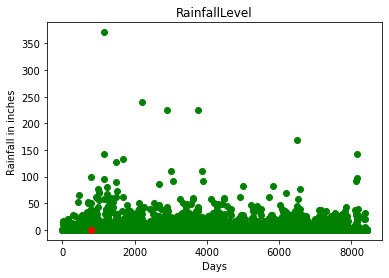

In [190]:
from sklearn.linear_model import LinearRegression


X = data.drop(['Rainfall'],axis=1)
Y = data['Rainfall'] 
Y = Y.values.reshape(-1, 1)
day_index = 798
days = [i for i in range(Y.size)]

clf = LinearRegression()
clf.fit(X, Y)

inp = np.array([[4],[7.4],[25.1],[2.2],[7.6],[8.0],[44.0],[5.0],[5.0],[4.0],[22.0],[44.0],[25.0],[1010.6],[1007.8],[1.0],[4.0],[17.2],[24.3],[0],[0],[12],[2]])
inp = inp.reshape(1, -1)

print('The Rainfall in mm for the input is:',clf.predict(inp))
print("The Rainfall trend graph:")
plt.scatter(days,Y,color = 'g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title('RainfallLevel')
plt.xlabel('Days')
plt.ylabel('Rainfall in inches')
plt.show()


In [173]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Date_month', 'Date_day'],
      dtype='object')

#### Plot a graph between few features vs 'Rainfall' to observe the treands

Rainfall Vs Selected Attributes Graph: 


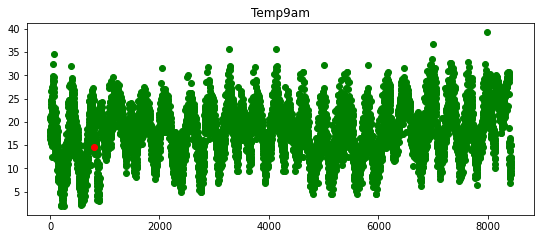

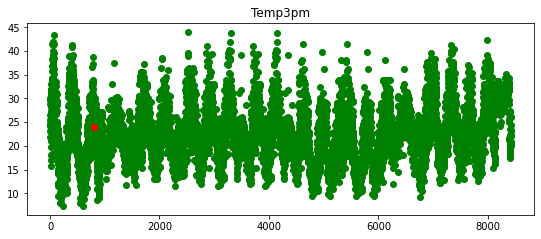

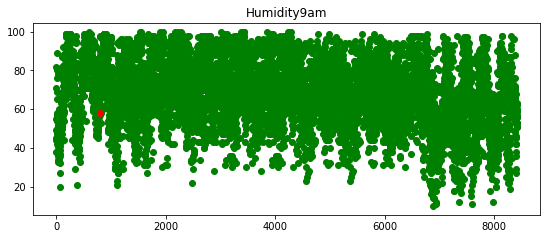

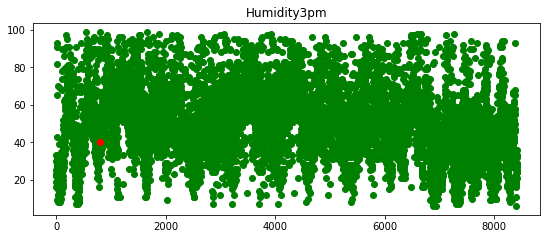

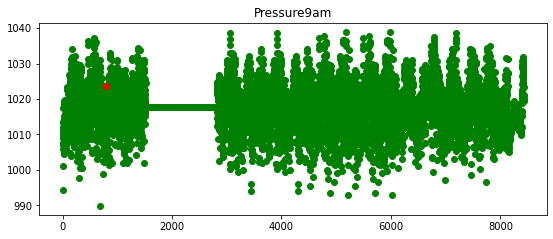

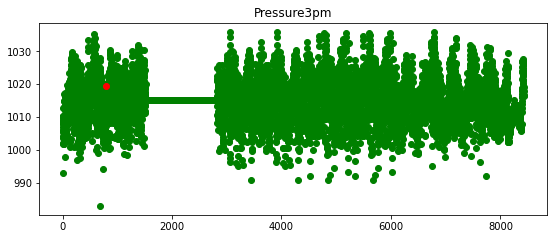

In [188]:
x_f = data.filter(['Temp9am','Temp3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm'],axis=1)
print("Rainfall Vs Selected Attributes Graph: ")
for i in range(x_f.columns.size):
    plt.figure(figsize=(20,12))
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
               [day_index],color='r')
    plt.title(x_f.columns.values[i])
    #Plot a graph between few features vs 'Rainfall' to observe the treands
plt.show()